<a href="https://colab.research.google.com/github/gaganishyadav/HamoyeDataScienceInternship/blob/main/HME_StageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv( "https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv" )

In [2]:
df.isnull().values.any()

False

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ])
df.set_index( "FullDate" , inplace= True )

In [9]:
df_daily = df.resample('D').sum()

In [10]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'ElecPrice')

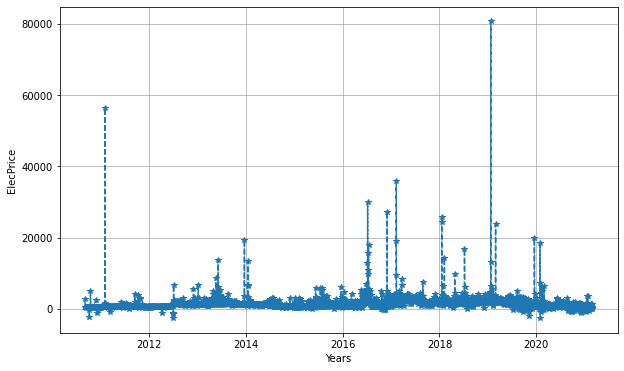

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Years' )
plt.ylabel( 'ElecPrice' )

In [18]:
from statsmodels.tsa.stattools import adfuller
adf_result1 = adfuller(df_daily[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result1[ 0 ]} ' )
print( f'p-value: {adf_result1[ 1 ]} ' )
print( f'No. of lags used: {adf_result1[ 2 ]} ' )
print( f'No. of observations used : {adf_result1[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result1[ 4 ].items():
 print( f' {k} : {v} ' ) 

ADF Statistic: -2.90276669716518 
p-value: 0.04502721288462542 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [21]:
adf_result2 = adfuller(df_daily[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result2[ 0 ]} ' )
print( f'p-value: {adf_result2[ 1 ]} ' )
print( f'No. of lags used: {adf_result2[ 2 ]} ' )
print( f'No. of observations used : {adf_result2[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result2[ 4 ].items():
 print( f' {k} : {v} ' ) 

ADF Statistic: -3.6901589888366457 
p-value: 0.004253725504574117 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 
